# Simple Speed Test for Python Data Analysis

In [24]:
computer_name = 'This computer'

In [25]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import platform
from PIL import Image

%matplotlib inline

In [26]:
# Results will be saved in this list

class SpeedTestResults:

    speed_test_results = []

    def __init__(self, name):
        
        self.name = name
        self.results = []
        self.system_info = self.get_system_info()
        self.test_name = None
        self.start_time = None
        self.finish_time = None
        self.test_running = False

    def get_system_info(self):

        system_info = {
            'Timestamp': str(pd.datetime.now()),
            'Computer name': platform.node(),
            'Python version': platform.python_version(),
            'Numpy version': np.__version__,
            'Pandas version': pd.__version__,
            'Matplotlib version': matplotlib.__version__
        }
        
        return system_info

    def start_test(self, name, show=True):
        
        assert self.test_running is False, "A test is already running."
        self.test_name = name
        self.start_time = time.time()
        self.test_running = True
        if show:
            print(f"\nTest {len(self.results) + 1} started: {self.test_name.__repr__()}")

    def finish_test(self, show=True):
        
        assert self.test_running is True, "No test is running."
        self.finish_time = time.time()
        self.test_running = False
        self.save_result(self.start_time, self.finish_time, self.test_name, show=show)
        if show:
            print(f"Test {len(self.results)} complete.")

    def save_result(self, start_time, finish_time, label, show=True):

        duration = finish_time - start_time
        info = {
            'Test Name': label,
            'Start Time (s)': start_time,
            'End Time (s)': finish_time,
            'Duration (s)': duration
        }

        self.results.append(info)
        if show:
            print(f"Test result saved: {duration:.5f} seconds.")

    def get_results(self):
        """Return results as a dataframe."""
        return pd.DataFrame.from_records(self.results)

    def save_results(self, filepath):
        """Save all results as a csv text file."""
        df = pd.DataFrame.from_records(self.results)
        df.to_csv(filepath)
        
    def clear_results(self):
        
        self.results = []
        self.test_name = None
        self.start_time = None
        self.finish_time = None
        self.test_running = False

In [27]:
speed_test_results = SpeedTestResults(computer_name)
speed_test_results.get_system_info()

{'Timestamp': '2019-07-29 21:40:48.715751',
 'Computer name': 'Bills-Mac-mini-2.local',
 'Python version': '3.7.3',
 'Numpy version': '1.16.2',
 'Pandas version': '0.24.2',
 'Matplotlib version': '3.0.3'}

### Test 1. CSV File Reading/Writing

In [28]:
# Create large data file

data_dir = 'data'
filename = 'data.csv'

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

filepath = os.path.join(data_dir, filename)
if not os.path.exists(filepath):
    n_rows, n_cols = (10000, 100)
    data = np.random.randn(n_rows*n_cols).reshape((n_rows, n_cols))
    df = pd.DataFrame(data, columns=[f"{i:05d}" for i in range(n_cols)])
    df.to_csv(filepath)
    print(f"Data file '{filename}' created.")
else:
    print(f"Data file '{filename}' already exists.")

Data file 'data.csv' already exists.


In [29]:
def test01(data_dir='data', filename1='data.csv', filename2='data2.csv',
           test_name='CSV file read-write'):

    speed_test_results.start_test(test_name)

    read_filepath = os.path.join(data_dir, filename1)
    write_filepath = os.path.join(data_dir, filename2)

    df = pd.read_csv(read_filepath)
    print(f"Data loaded from file '{filename1}'")

    df.to_csv(write_filepath)
    print(f"Data saved to file '{filename2}'")

    speed_test_results.finish_test()

### Test 2. Image File Read - Manipulate - Write

In [30]:
# Use this image file

image_dir = 'images'
read_filename = 'screenshot.png'
write_filename = 'screenshot2.png'

read_filepath = os.path.join(image_dir, read_filename)
write_filepath = os.path.join(image_dir, write_filename)

if not os.path.exists(image_dir):
    os.mkdir(image_dir)

im = Image.open(read_filepath)
print(f"Image from file '{filename}' size {im.size} pixels found.")

Image from file 'data.csv' size (1920, 1080) pixels found.


In [31]:
def test02(image_dir='images', filename1='screenshot.png', filename2='screenshot2.png',
           test_name='Image file read-rotate-write'):

    speed_test_results.start_test(test_name)

    im = Image.open(read_filepath)
    print(f"Image loaded from file '{read_filename}'")
    im2 = im.rotate(45)
    print(f"Image rotated")
    im2.save(write_filepath)
    print(f"Image saved to file '{write_filepath}'")

    speed_test_results.finish_test()

### Test 3. N-Dimensional Array Calculation - Powers

In [32]:

def test03(array_shape=(1000, 1000), n=50, test_name='ND-Array power calculation'):
    
    speed_test_results.start_test(test_name)
    
    print(f"Doing {n} Numpy array calculations {array_shape}...")
    x = np.random.random(array_shape)
    for i in range(n):
        y = x**3 - 0.5*x**2 + x
    
    speed_test_results.finish_test()

### Calculate Fibonacci number in Python

In [33]:
from functools import reduce
import operator

def fib_sequence_generator(n):
    a, b = 0, 1
    for i in range(n):
        yield a
        a, b = b, a + b

def fib_number(n):
    a, b = 0, 1
    for i in range(n-1):
        a, b = b, a + b
    return a

n = 500
fib_number(n)
# This doesn't take long
#%timeit fib_number(n)
# 45.4 µs ± 1.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

86168291600238450732788312165664788095941068326060883324529903470149056115823592713458328176574447204501

### Calculate Pi in Python

In [34]:
from decimal import Decimal, getcontext

n = 100
getcontext().prec = n

def calculate_pi(n):
    return sum(1/Decimal(16)**k * 
          (Decimal(4)/(8*k+1) - 
           Decimal(2)/(8*k+4) - 
           Decimal(1)/(8*k+5) -
           Decimal(1)/(8*k+6)) for k in range(n))

calculate_pi(n)
# This doesn't take long
#%timeit calculate_pi(n)
# 620 µs ± 23.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Decimal('3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117070')

### Test 4. Calculate Mandelbrot set in Pure Python

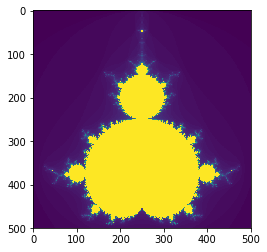

In [35]:
# Calcualte mandelbrot set (naive implementation)

def mandelbrot(z, maxiter):
    c = z
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return maxiter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    data = np.fromiter((mandelbrot(complex(r, i), maxiter) for r in r1 for i in r2), 
                       dtype=int)
    return (r1, r2, data)

r1, r2, data = mandelbrot_set(-2.0, 0.5, -1.25, 1.25, 500, 500, 100)

plt.imshow(data.reshape(r1.shape[0], r2.shape[0]))
plt.show()

In [36]:
def test04(width=500, height=500, maxiter=100, test_name='Mandelbrot set in Python'):
    
    speed_test_results.start_test(test_name)

    im = Image.open(read_filepath)
    print(f"Calculating Mandelbrot set ({width}, {height})...")
    r1, r2, data = mandelbrot_set(-2.0, 0.5, -1.25, 1.25, width, height, maxiter)

    speed_test_results.finish_test()


## Run tests

In [37]:
tests = [
    test01,
    test02,
    test03,
    test04
]

for i in range(3):
    for test in tests:
        test()


Test 1 started: 'CSV file read-write'
Data loaded from file 'data.csv'
Data saved to file 'data2.csv'
Test result saved: 2.27533 seconds.
Test 1 complete.

Test 2 started: 'Image file read-rotate-write'
Image loaded from file 'screenshot.png'
Image rotated
Image saved to file 'images/screenshot2.png'
Test result saved: 0.75246 seconds.
Test 2 complete.

Test 3 started: 'ND-Array power calculation'
Doing 50 Numpy array calculations (1000, 1000)...
Test result saved: 2.18952 seconds.
Test 3 complete.

Test 4 started: 'Mandelbrot set in Python'
Calculating Mandelbrot set (500, 500)...
Test result saved: 1.60918 seconds.
Test 4 complete.

Test 5 started: 'CSV file read-write'
Data loaded from file 'data.csv'
Data saved to file 'data2.csv'
Test result saved: 2.27998 seconds.
Test 5 complete.

Test 6 started: 'Image file read-rotate-write'
Image loaded from file 'screenshot.png'
Image rotated
Image saved to file 'images/screenshot2.png'
Test result saved: 0.77128 seconds.
Test 6 complete.



### Results

In [38]:
results = speed_test_results.get_results()
results

,Duration (s),End Time (s),Start Time (s),Test Name
0,2.275334,1.564462e+09,1.564462e+09,CSV file read-write
1,0.752457,1.564462e+09,1.564462e+09,Image file read-rotate-write
2,2.189518,1.564462e+09,1.564462e+09,ND-Array power calculation
3,1.609177,1.564462e+09,1.564462e+09,Mandelbrot set in Python
4,2.279982,1.564462e+09,1.564462e+09,CSV file read-write
5,0.771279,1.564462e+09,1.564462e+09,Image file read-rotate-write
6,2.181174,1.564462e+09,1.564462e+09,ND-Array power calculation
7,1.621700,1.564462e+09,1.564462e+09,Mandelbrot set in Python
8,2.289678,1.564462e+09,1.564462e+09,CSV file read-write
9,0.759815,1.564462e+09,1.564462e+09,Image file read-rotate-write


In [39]:
average_speeds = results[['Test Name', 'Duration (s)']].groupby('Test Name').mean()
average_speeds = average_speeds.rename(columns={'Duration (s)': 'Average Duration (s)'})
average_speeds

,Average Duration (s)
Test Name,
CSV file read-write,2.281665
Image file read-rotate-write,0.761184
Mandelbrot set in Python,1.612893
ND-Array power calculation,2.187412


In [40]:
average_speeds.sum()

Average Duration (s)    6.843154
dtype: float64

In [41]:
# Save results to csv file

results_dir = 'results'
filename1 = f'{computer_name}.csv'
filename2 = f'{computer_name}_averages.csv'

if not os.path.exists(results_dir):
    os.mkdir(results_dir)

filepath = os.path.join(results_dir, filename1)
speed_test_results.save_results(filepath)

filepath = os.path.join(results_dir, filename2)
average_speeds.to_csv(filepath)

## Compare all results in this repository

In [42]:
results_files = os.listdir(results_dir)
results_files

['.DS_Store',
 '2011 Mac Mini i5.csv',
 '2011 Mac Mini i5_averages.csv',
 '2011 Mac Mini i7.csv',
 '2011 Mac Mini i7_averages.csv',
 '2012 Mac Mini i7.csv',
 '2012 Mac Mini i7_averages.csv',
 '2013 Macbook Pro.csv',
 '2013 Macbook Pro_averages.csv',
 'This computer.csv',
 'This computer_averages.csv']

In [43]:
filenames = []
results_data = []
for filename in results_files:
    if '_averages' in filename:
        filepath = os.path.join(results_dir, filename)
        df = pd.read_csv(filepath).set_index('Test Name')
        results_data.append(df)
        filenames.append(filename)
print(f"{len(results_data)} results loaded from files.")

5 results loaded from files.


In [44]:
computer_names = [s.replace('_averages.csv', '') for s in filenames]
combined_results = pd.concat(results_data, keys=computer_names, names=['Computer', 'Test Name'])
combined_results

Average Duration (s)
Computer         Test Name                                         
2011 Mac Mini i5 CSV file read-write                       3.007876
                 Image file read-rotate-write              1.956995
                 Mandelbrot set in Python                  2.044861
                 ND-Array power calculation                2.769947
2011 Mac Mini i7 CSV file read-write                       2.376102
                 Image file read-rotate-write              1.601991
                 Mandelbrot set in Python                  1.938871
                 ND-Array power calculation                2.251682
2012 Mac Mini i7 CSV file read-write                       2.372185
                 Image file read-rotate-write              0.766300
                 Mandelbrot set in Python                  1.549523
                 ND-Array power calculation                2.214447
2013 Macbook Pro CSV file read-write                       1.978711
                 Image file read-rotate-write              0.824022
                 Mandelbrot set in Python                  1.361552
                 ND-Array power calculation                1.407906
This computer    CSV file read-write                       2.281665
                 Image file read-rotate-write              0.761184
                 Mandelbrot set in Python                  1.612893
                 ND-Array power calculation                2.187412

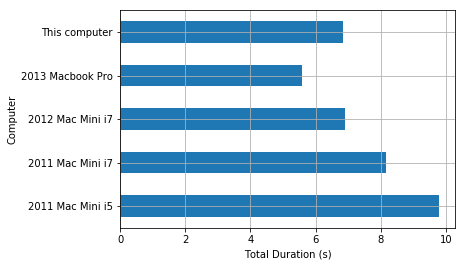

In [45]:
label = 'Average Duration (s)'
new_label = 'Total Duration (s)'
rename_map = {label: new_label}
total_duration_by_computer = combined_results[label].groupby('Computer').sum().rename(columns=rename_map)
total_duration_by_computer.plot.barh()
plt.xlabel(new_label)
plt.grid()
plt.show()

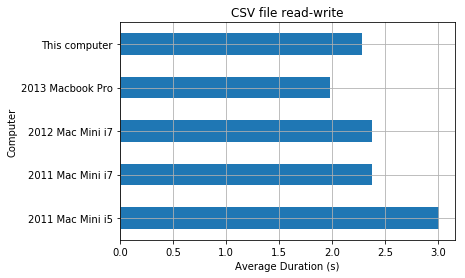

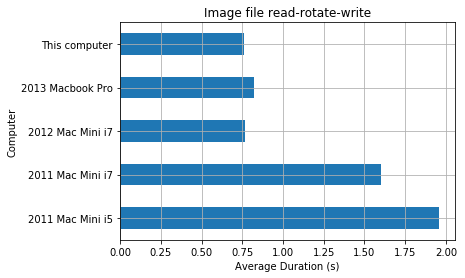

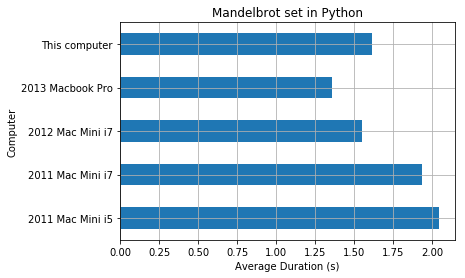

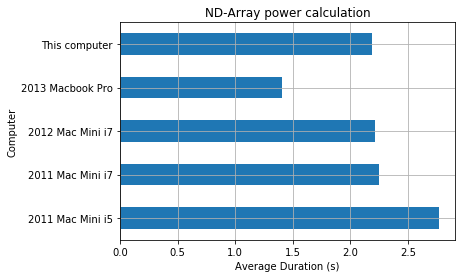

In [46]:
groupby_test = combined_results.groupby('Test Name')
label = 'Average Duration (s)'
#results_by_test.index = results_by_test.index.droplevel(0)
for test_name, results in groupby_test:
    results = results.droplevel(1)[label]
    results.plot.barh()
    plt.title(test_name)
    plt.xlabel(label)
    plt.grid()
    plt.show()